In [1]:
import os
import pandas as pd
from collections import Counter

# Define base directory
base_dir = "reduced_features"

# Subdirectories
methods = ["RFE", "Correlation", "Variance"]
categories = ["B", "S", "D", "K"]

# Dictionary to store feature counts
feature_counts = Counter()

# Traverse the directory structure
for method in methods:
    for category in categories:
        folder_path = os.path.join(base_dir, method, category)
        
        # Ensure the directory exists
        if not os.path.exists(folder_path):
            continue

        # Iterate over files
        for file in os.listdir(folder_path):
            if file.startswith(f"reduced_desc_{method}") and file.endswith(".csv"):
                file_path = os.path.join(folder_path, file)
                
                # Read header (first row)
                df = pd.read_csv(file_path, nrows=0)
                feature_counts.update(df.columns)  # Add feature names to counter

# Display the most common features
print("Most commonly used features:")
for feature, count in feature_counts.most_common(20):  # Top 20 features
    print(f"{feature}: {count}")


Most commonly used features:
Ipc: 58
SMR_VSA1: 52
TPSA: 52
EState_VSA1: 52
SlogP_VSA2: 51
EState_VSA5: 51
EState_VSA6: 51
VSA_EState2: 50
PEOE_VSA6: 49
SMR_VSA10: 49
MaxAbsEStateIndex: 48
EState_VSA10: 48
HeavyAtomCount: 48
MolMR: 48
LabuteASA: 47
PEOE_VSA10: 47
SMR_VSA4: 47
SlogP_VSA3: 47
SlogP_VSA5: 47
EState_VSA4: 47


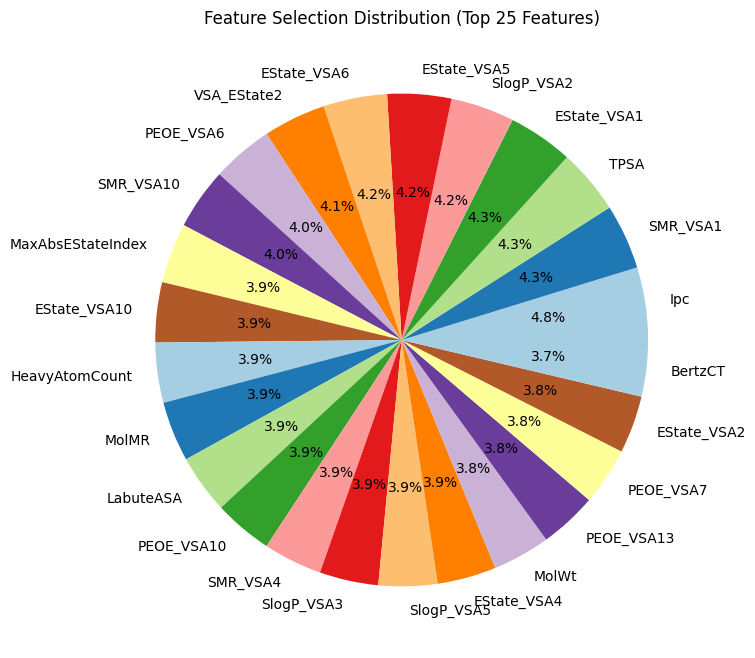

In [12]:
# Pie chart for top 10 features
top_features = feature_counts.most_common(25)
features, counts = zip(*top_features)

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=features, autopct="%1.1f%%", colors=plt.cm.Paired.colors)
plt.title("Feature Selection Distribution (Top 25 Features)")
plt.show()


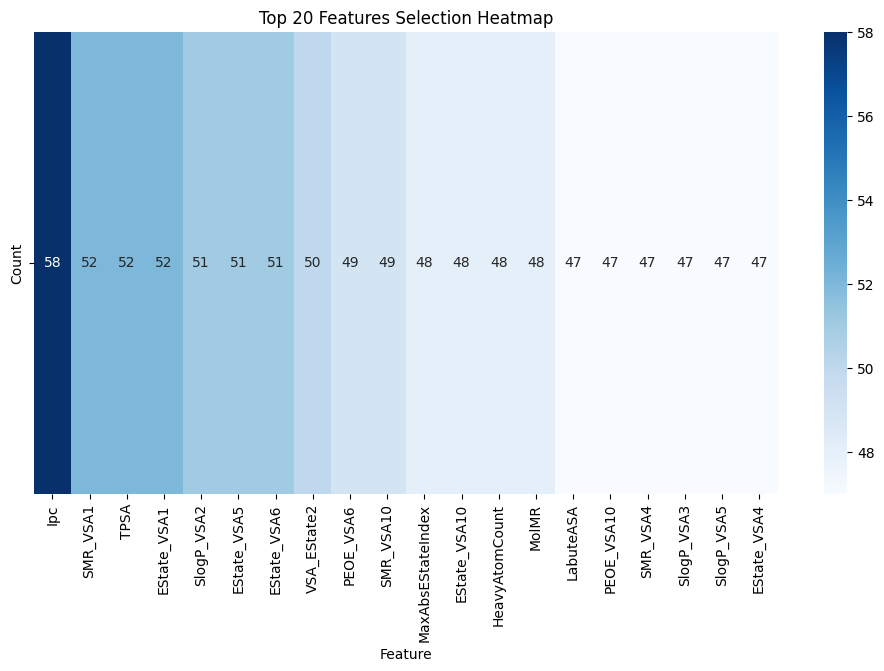

In [7]:
import seaborn as sns

# Convert feature counts to DataFrame
feature_df = pd.DataFrame(feature_counts.most_common(20), columns=["Feature", "Count"])

# Create heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(feature_df.set_index("Feature").T, cmap="Blues", annot=True, fmt=".0f")
plt.title("Top 20 Features Selection Heatmap")
plt.show()
